<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[50, 100],
              'learning_rate':[0.1, 0.005, 0.2],
              'max_depth':[3, 4, 5]}

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb, param_grid)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.005, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
pred = grid.predict(X_test)

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
confusion_matrix(y_test, pred)

array([[655,   0],
       [  0, 564]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
feat = grid.best_estimator_.feature_importances_

imp_feature = pd.DataFrame(feat, index=X.columns, columns=['Importance']).sort_values('Importance')
imp_feature = imp_feature[imp_feature['Importance']> 0.0005]

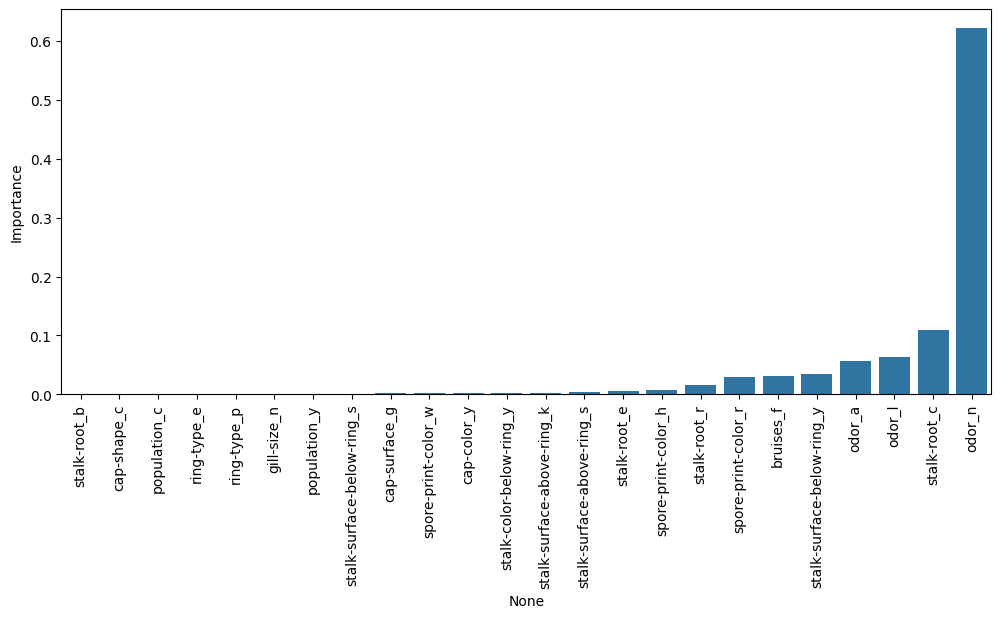

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=imp_feature.index, y=imp_feature['Importance'], data=imp_feature)
plt.xticks(rotation=90)
plt.show()